# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src

sys.path.append(os.path.join(project_root, 'src'))
from metrics import *
from model_factory import model_factory
from model import UFCModel
from data import UFCData
from config import *
from io_model import load_data, load_model
from helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Load the CSV into a DataFrame
try:
    ufc_data = load_data()
    ufc_data.summary()
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

/home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6300
🧪 Train/Test split  : 5040 / 1260
🧪 Total features     : 26

🔢 Numerical features : 22
🔠 Categorical features: 4
    - Binary          : 2
    - Multiclass      : 2

🏷 Label distribution (raw):
   - Class 0: 3662 (58.1%)
   - Class 1: 2638 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                           mean      std       min       max
LoseStreakDif             0.068    1.012    -6.000     6.000
WinStreakDif             -0.142    1.887   -18.000    10.000
LongestWinStreakDif      -0.763    2.026   -12.000    14.000
WinDif                   -1.496    4.167   -28.000    23.000
LossDif                   0.102    3.103   -19.000    16.000
TotalTitleBoutDif        -0.308    1.663   -16.000    14.000
KODif                  

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Load Models

In [3]:
model_list = [UFCModel(model=load_model(name, verbose=True)) for name in pretty_model_name]

📦 Model Logistic Regression loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
📦 Model Random Forest loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
📦 Model Support Vector Machine loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
📦 Model K-Nearest Neighbors loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
📦 Model AdaBoost loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
📦 Model Naive Bayes loaded from: /home/mlioi/ufc-predictor/models/nb_best.pkl
📦 Model Extra Trees loaded from: /home/mlioi/ufc-predictor/models/et_best.pkl
📦 Model Gradient Boosting loaded from: /home/mlioi/ufc-predictor/models/gb_best.pkl
📦 Model Quadratic Discriminant Analysis loaded from: /home/mlioi/ufc-predictor/models/qda_best.pkl
📦 Model Neural Network loaded from: /home/mlioi/ufc-predictor/models/nn_best.pkl
📦 Model XGBoost loaded from: /home/mlioi/ufc-predictor/models/xgb_best.pkl


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 4. Evaluate Models

In [4]:
for model in model_list:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

## 5. Check Models

### Metrics Comparison

In [5]:
model_metrics = compare_metrics(model_list)

INFO:metrics:Starting comparison of models...
INFO:metrics:Evaluating: Logistic Regression
INFO:metrics:Evaluating: Random Forest
INFO:metrics:Evaluating: Support Vector Machine
INFO:metrics:Evaluating: K-Nearest Neighbors
INFO:metrics:Evaluating: AdaBoost
INFO:metrics:Evaluating: Naive Bayes
INFO:metrics:Evaluating: Extra Trees
INFO:metrics:Evaluating: Gradient Boosting
INFO:metrics:Evaluating: Quadratic Discriminant Analysis
INFO:metrics:Evaluating: Neural Network
INFO:metrics:Evaluating: XGBoost


╔════════════════════════╗
║  Comparison Completed  ║
╚════════════════════════╝


In [6]:
display(model_metrics)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression,0.6627,0.6173,0.5133,0.5605,0.7153,0.2117
Random Forest,0.6675,0.6380,0.4773,0.5460,0.7108,0.2133
Support Vector Machine,0.6643,0.6174,0.5227,0.5662,0.7233,0.2086
K-Nearest Neighbors,0.6349,0.5802,0.4659,0.5168,0.6480,0.2298
AdaBoost,0.6683,0.6471,0.4583,0.5366,0.7144,0.2109
Naive Bayes,0.6008,0.7778,0.0663,0.1222,0.6650,0.3078
Extra Trees,0.6548,0.6405,0.4015,0.4936,0.6996,0.2179
Gradient Boosting,0.6762,0.6471,0.5000,0.5641,0.7202,0.2085
Quadratic Discriminant Analysis,0.6587,0.6061,0.5303,0.5657,0.6984,0.2173


### Best Model per Metric

In [7]:
best_models_df = best_model_per_metric(model_metrics)
display(best_models_df)

INFO:metrics:Best model for Accuracy: Gradient Boosting (0.6762)
INFO:metrics:Best model for Precision: Naive Bayes (0.7778)
INFO:metrics:Best model for Recall: Neural Network (0.5606)
INFO:metrics:Best model for F1 Score: Neural Network (0.5850)
INFO:metrics:Best model for ROC AUC: Support Vector Machine (0.7233)
INFO:metrics:Best model for Brier Score: Naive Bayes (0.3078)


,Metric,Best Model,Value
0,Accuracy,Gradient Boosting,0.6762
1,Precision,Naive Bayes,0.7778
2,Recall,Neural Network,0.5606
3,F1 Score,Neural Network,0.5850
4,ROC AUC,Support Vector Machine,0.7233
5,Brier Score,Naive Bayes,0.3078


### Feature Importance

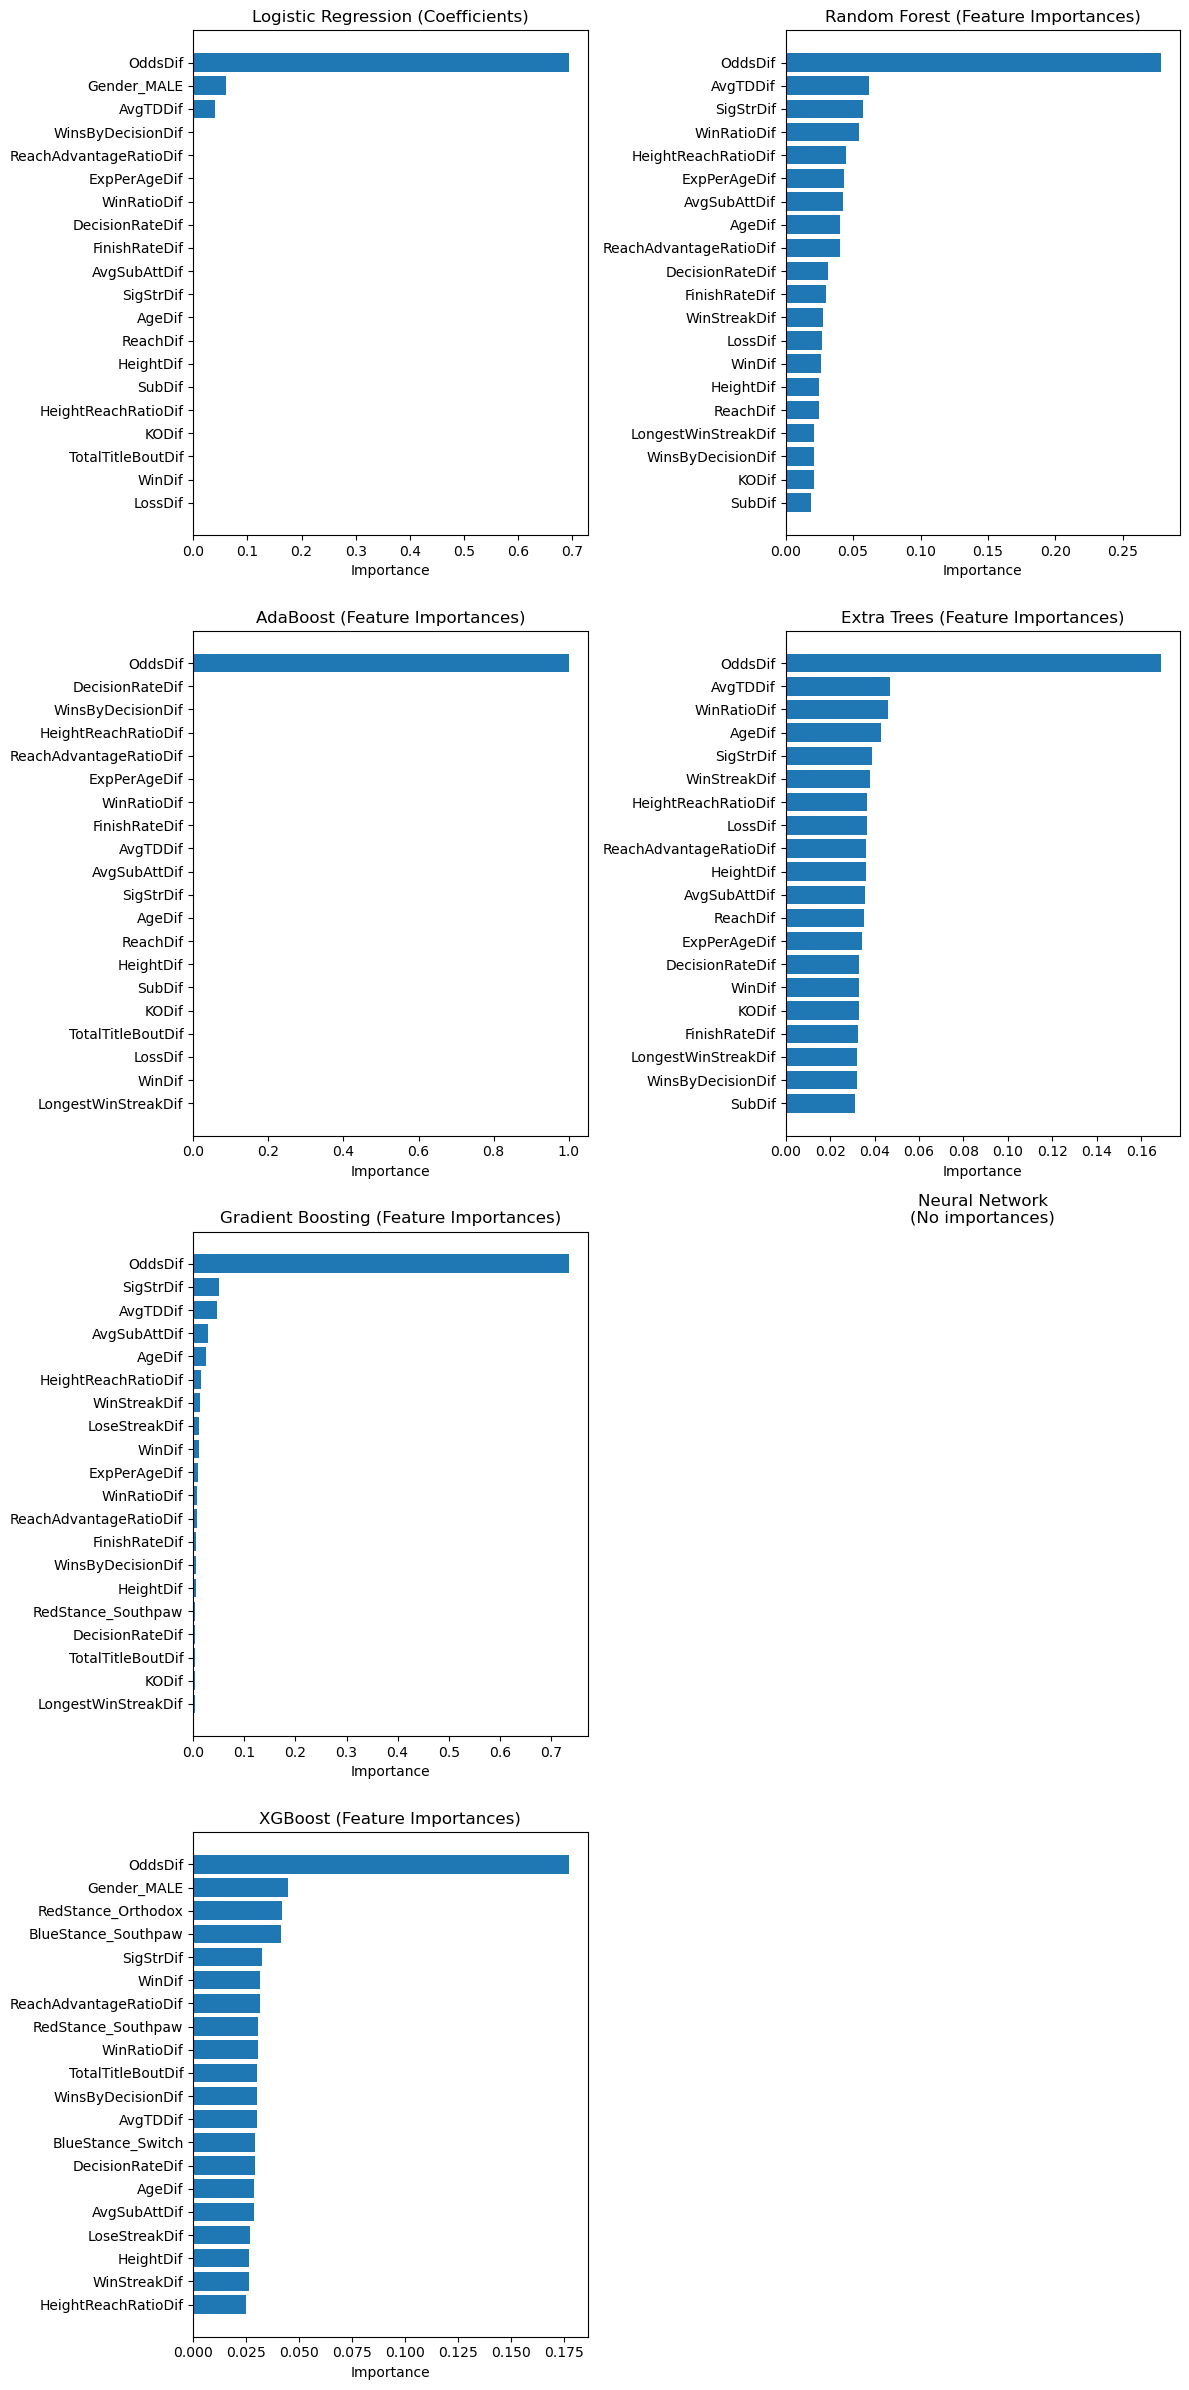

In [8]:
filtered_models = [
    m for m in model_list
    if m.name not in ['Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'Quadratic Discriminant Analysis']
]

n_models = len(filtered_models)
n_cols = 2 
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, model in enumerate(filtered_models):
    ax = axes[i]
    mdl = model.model
    if hasattr(mdl, "best_estimator_"):
        mdl = mdl.best_estimator_
    if hasattr(mdl, "feature_importances_"):
        importances = mdl.feature_importances_
        title = f"{model.name} (Feature Importances)"
    elif hasattr(mdl, "coef_"):
        importances = np.abs(mdl.coef_.ravel())
        title = f"{model.name} (Coefficients)"
    else:
        ax.axis('off')
        ax.set_title(f"{model.name}\n(No importances)")
        continue

    feature_names = ufc_data._X_train_processed.columns
    max_display = 20
    sorted_idx = np.argsort(importances)[::-1][:max_display]
    top_features = [feature_names[i] for i in sorted_idx]
    top_importances = importances[sorted_idx]
    ax.barh(top_features[::-1], top_importances[::-1])
    ax.set_title(title)
    ax.set_xlabel("Importance")

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

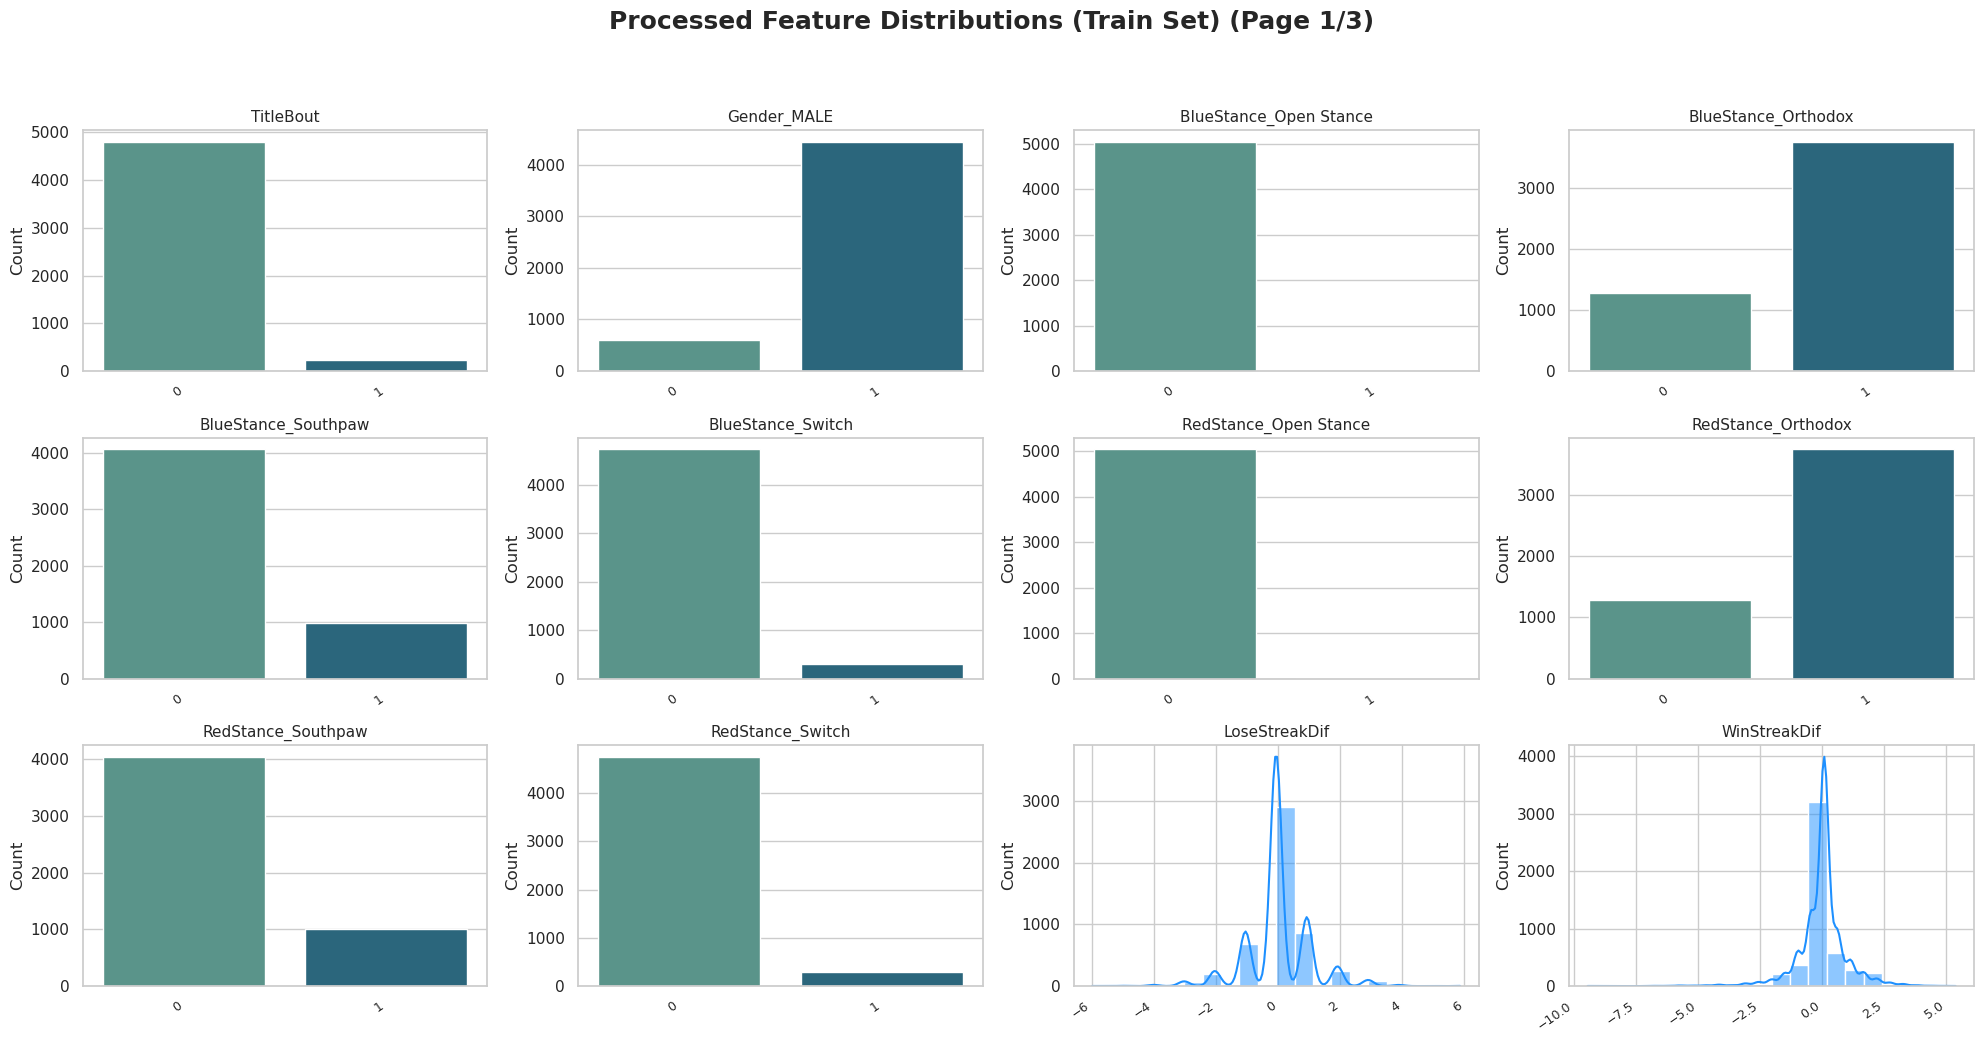

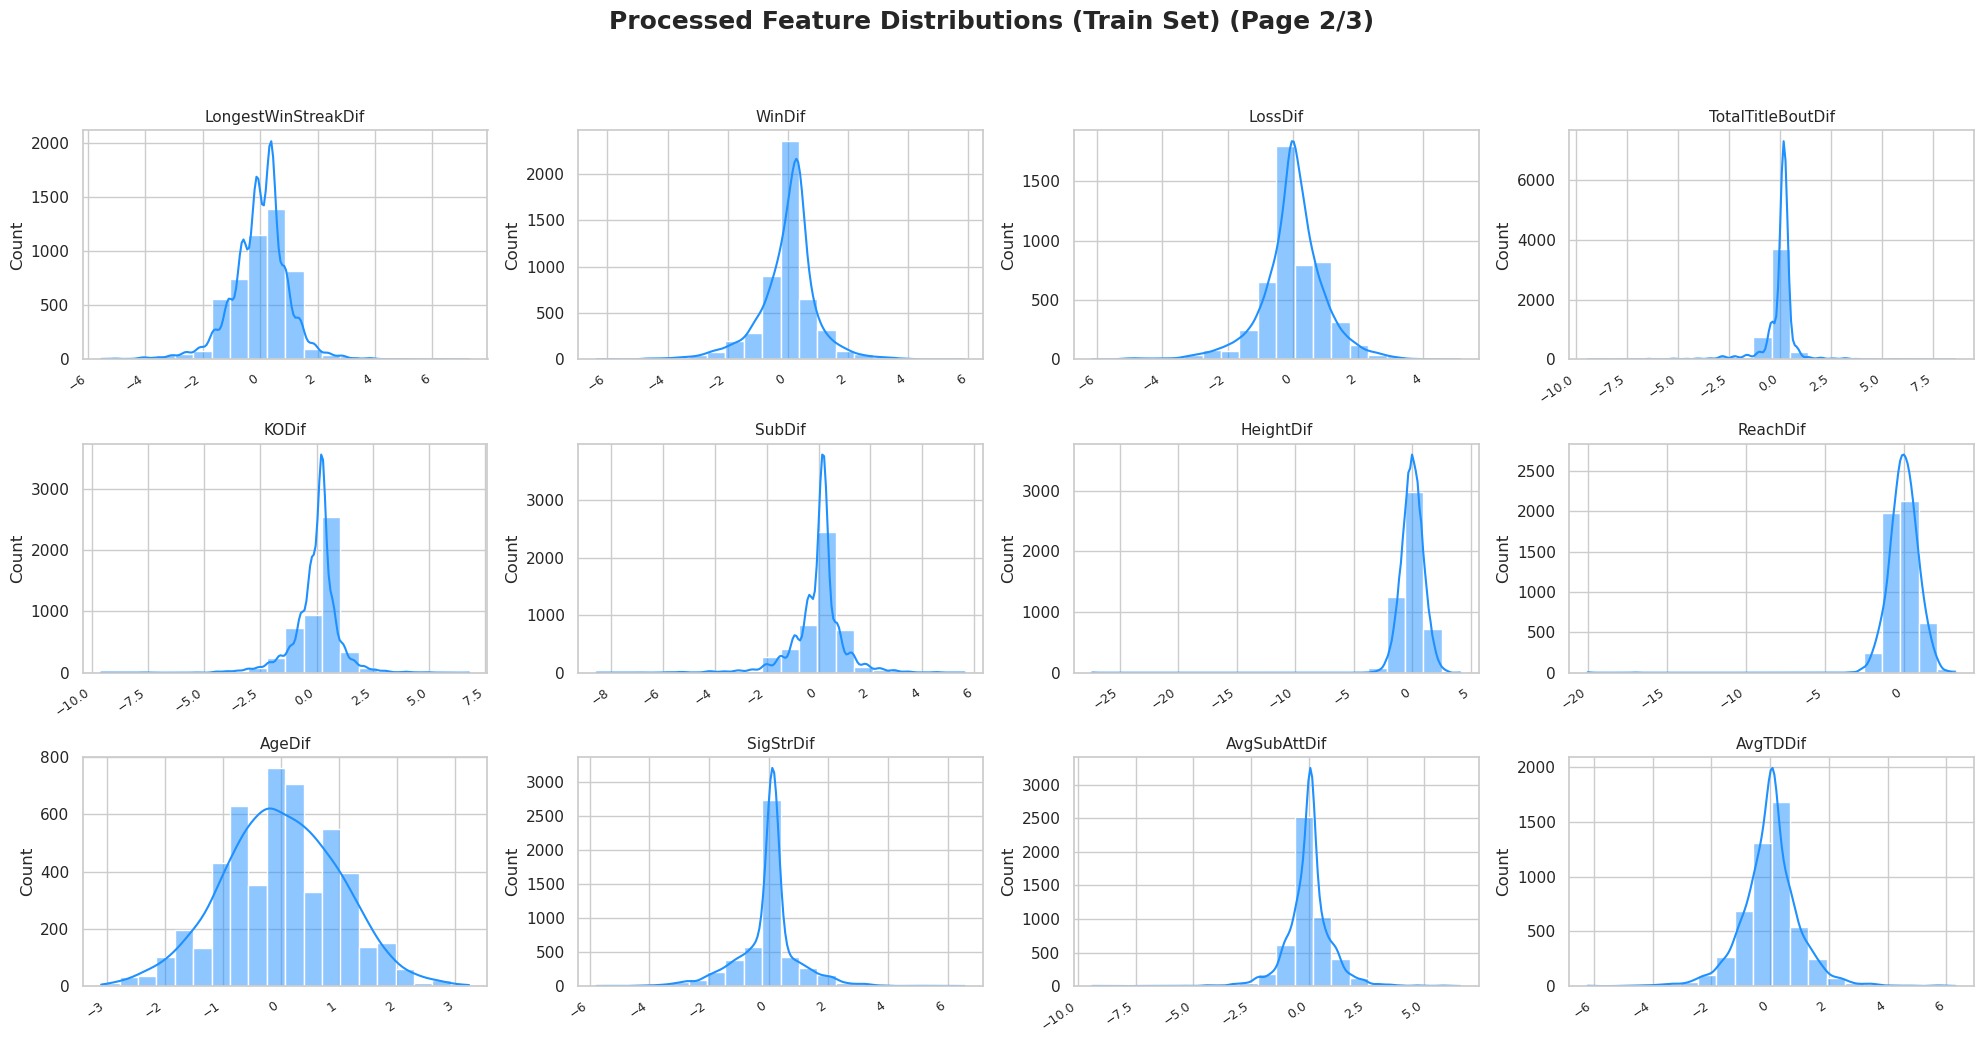

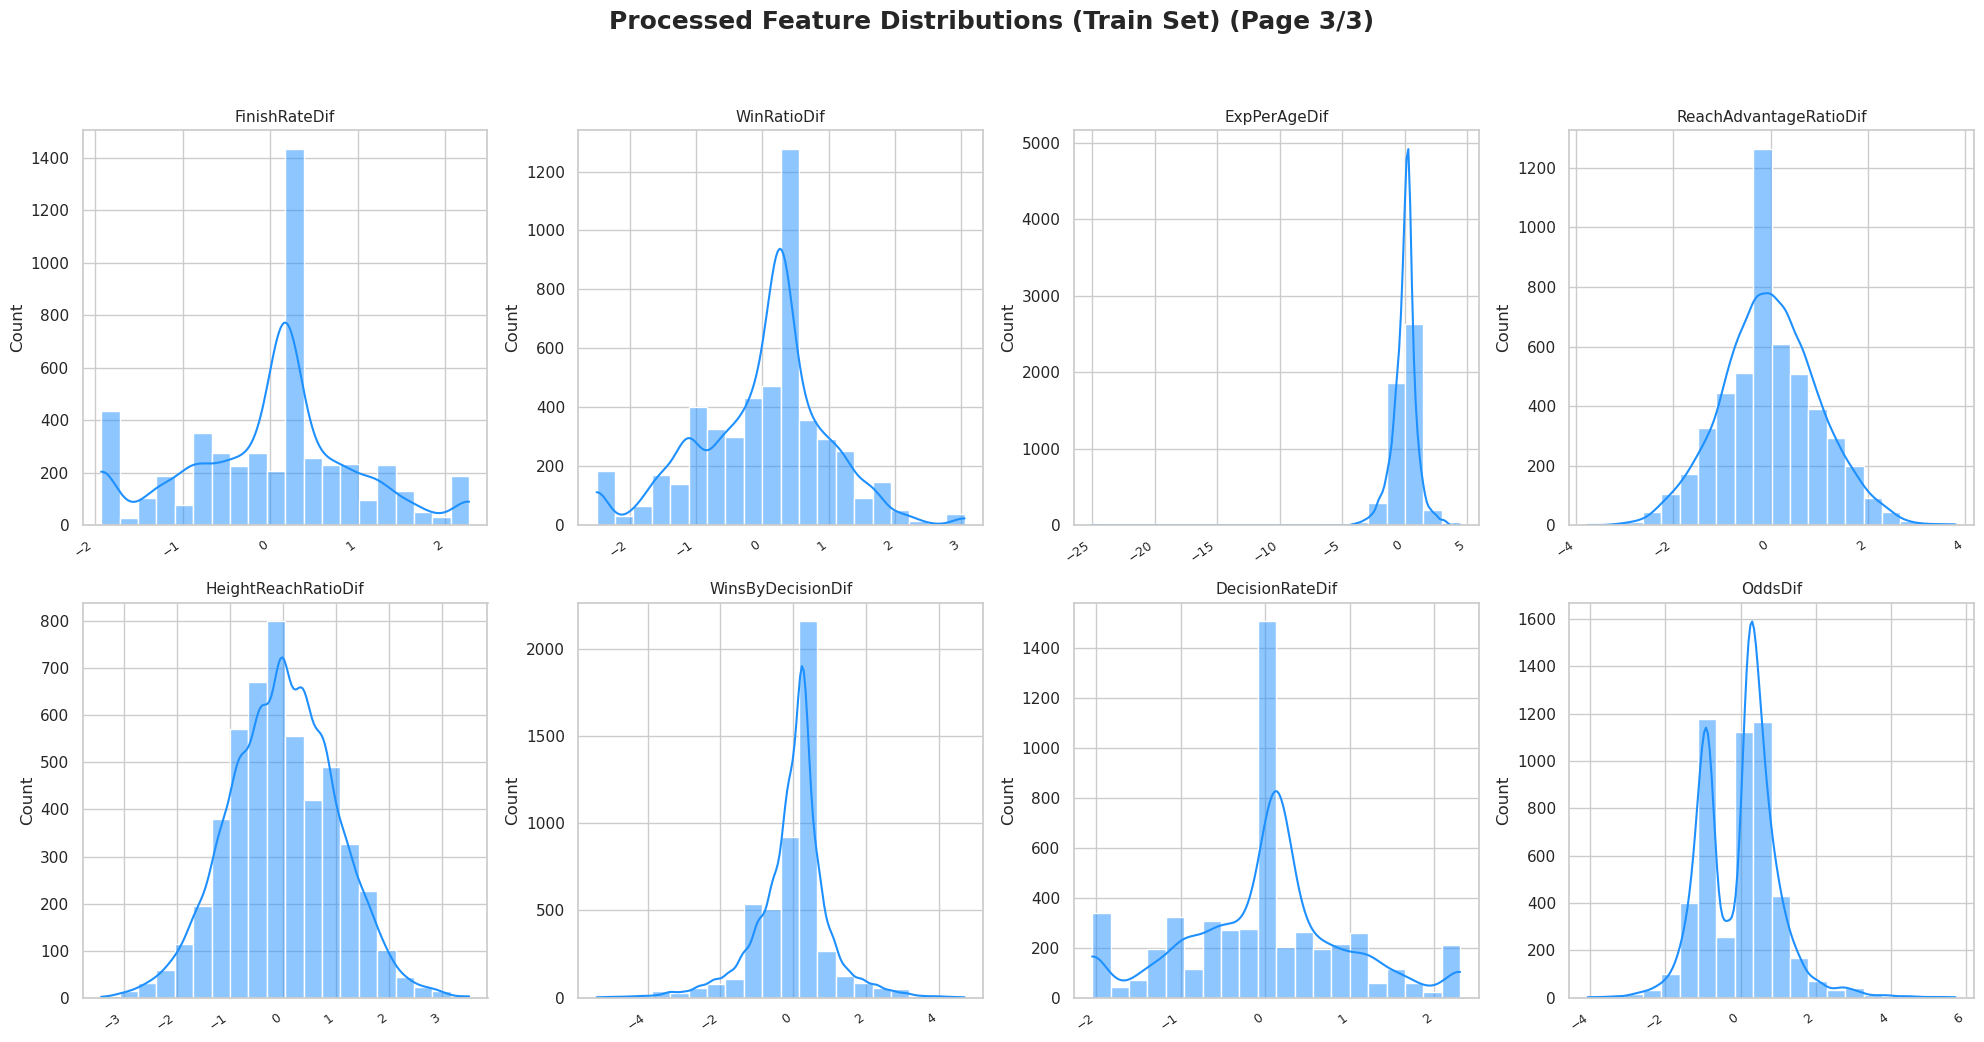

In [9]:
ufc_data.plot_feature_distributions(processed=True)